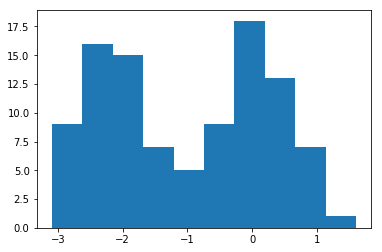

In [35]:
import numpy as np
def data_generator()
    n0 = np.random.normal(loc=0.0, scale=0.5, size=50)
    n1 = np.random.normal(loc=-2.0, scale=0.5, size=50)
    data = np.hstack((n0, n1))
    return data
import matplotlib.pyplot as plt
plt.hist(data)
plt.show()

In [49]:
cluster = 2
MAX = 100
lamda = np.random.rand(cluster)
pai = np.random.dirichlet([0.03, 0.03, 0.03])

In [50]:
print(lamda)
print(pai)

[0.40616005 0.19440413]
[1.82610373e-11 1.58194213e-03 9.98418058e-01]


In [51]:
import numpy as np
[np.random.dirichlet([0.03, 0.03, 0.03]) for _ in range(10)]

[array([9.99771290e-01, 2.28709628e-04, 9.08668663e-47]),
 array([5.09762603e-07, 9.99999019e-01, 4.71069107e-07]),
 array([0.08124434, 0.00583676, 0.9129189 ]),
 array([9.99954341e-01, 2.30082857e-22, 4.56586947e-05]),
 array([6.47396252e-10, 3.57301533e-86, 9.99999999e-01]),
 array([9.99996385e-01, 1.12488697e-27, 3.61479457e-06]),
 array([9.96064841e-01, 3.92394920e-03, 1.12093678e-05]),
 array([6.49397269e-28, 6.77648732e-35, 1.00000000e+00]),
 array([9.00842212e-14, 1.00000000e+00, 9.32208433e-13]),
 array([2.63092639e-21, 3.58516214e-01, 6.41483786e-01])]

In [52]:
import numpy as np
import math

random_categorical = np.random.multinomial(1, [0.2, 0.3, 0.5], 1)
random_categorical

array([[0, 1, 0]])

In [67]:
def clustering(data):
    ita = np.zeros((len(data), cluster))
    ita_tmp = np.zeros(cluster)
    s = []
    for n in range(len(data)):
        for k in range(cluster):
            ita_tmp[k] = math.exp(data[n] * math.log(lamda[k]) \
                         - lamda[k] + math.log(pai[k]))
            ita_tmp = ita_tmp / sum(ita_tmp)
        ita[n, :] = ita_tmp
        s.append(np.random.multinomial(1, ita_tmp, 1))
    return s

In [58]:
len(s)

100

In [137]:
import matplotlib.pyplot as plt
import math
import numpy as np

def clustering(data, lamda, pai, MAX, cluster, a=0, b=0):
    ita = np.zeros((len(data), cluster))
    ita_tmp = np.zeros(cluster)
    s = np.zeros_like(ita)
    for _ in range(MAX):
        for n in range(len(data)):
            for k in range(cluster):
                ita_tmp[k] = math.exp(data[n] * math.log(lamda[k]) \
                             - lamda[k] + math.log(pai[k]))
            ita_tmp = ita_tmp / sum(ita_tmp)
            s[n] = np.random.multinomial(1, ita_tmp, 1)
        for k in range(cluster):
            a = np.dot(s[:, k], data)
            b = sum(s[:, k])
            lamda[k] = np.random.gamma(a,b)
        pai = np.random.dirichlet([sum(s[:, k]) for k in range(cluster)])
    return s

def data_generator(cluster):
    data = []
    for c in range(cluster):
        data = np.hstack([np.random.poisson(c + 10) for j in range(50)])
    data = np.array(data)
    lamda = np.random.rand(cluster)
    pai = np.random.dirichlet([0.1, 0.1])
    return data, lamda, pai


if __name__ == "__main__":
    MAX = 1
    cluster = 2
    data, lamda, pai = data_generator(cluster)
    label = clustering(data, lamda, pai, MAX, cluster)

2


In [81]:
np.random.dirichlet([1,2])

array([0.31457463, 0.68542537])

In [100]:
np.random.gamma((1,1))

array([0.05756932, 0.23301897])

11